## Test Benchmark for MSFR - propotype
- Dataset : https://archive.ics.uci.edu/dataset/321/electricityloaddiagrams20112014 by Artur Trindade
- Reason why we should do this Benchmark : 
- Tester : 김민결(tatatommy6)

{아래는 자유롭게 벤치마크 결과를 요약}

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../LD2011_2014_converted.csv", engine='python')

df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.set_index('Datetime').sort_index()

print(type(df.index))
print(df.index.min(), "→", df.index.max())


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
2011-01-01 00:15:00 → 2015-01-01 00:00:00


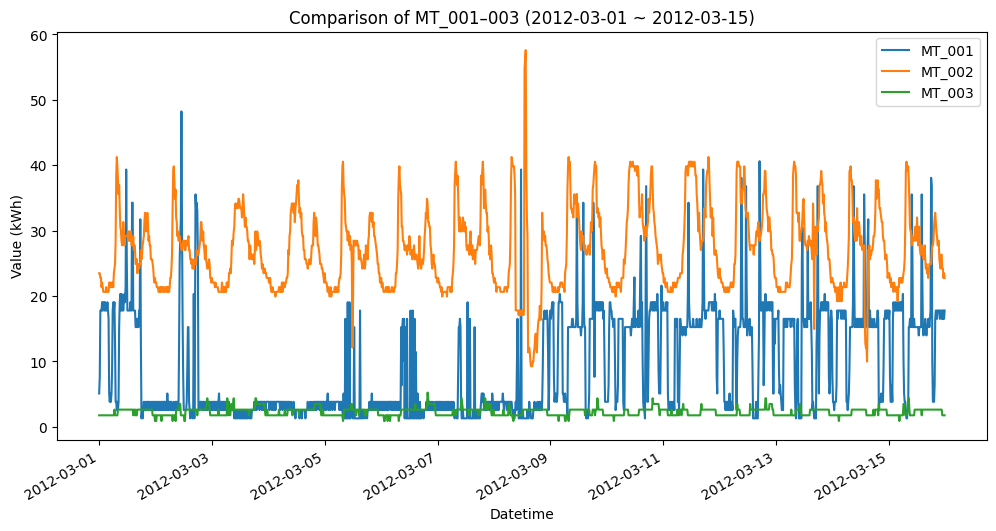

In [12]:
subset = df.loc['2012-03-01':'2012-03-15', ['MT_001','MT_002','MT_003']].copy()

plt.figure(figsize=(12,6))
for c in subset.columns:
    plt.plot(subset.index, subset[c], label=c)

plt.title('Comparison of MT_001–003 (2012-03-01 ~ 2012-03-15)')
plt.xlabel('Datetime')
plt.ylabel('Value (kWh)')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 라벨 겹침 방지
plt.savefig('mt_001_003_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [8]:
print("index type:", type(df.index))
print("index range:", df.index.min(), "→", df.index.max())
print("has MT_001~003?:", all(c in df.columns for c in ["MT_001","MT_002","MT_003"]))
print("non-null counts:\n", df[["MT_001","MT_002","MT_003"]].notna().sum())
print("non-zero counts:\n", (df[["MT_001","MT_002","MT_003"]]!=0).sum())


index type: <class 'pandas.core.indexes.range.RangeIndex'>
index range: 0 → 140255
has MT_001~003?: True
non-null counts:
 MT_001    140256
MT_002    140256
MT_003    140256
dtype: int64
non-zero counts:
 MT_001     99513
MT_002    105212
MT_003    104606
dtype: int64
